In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import TruncatedSVD
import random
# import seaborn as sns
import os.path as path
import os
# import matplotlib
# import matplotlib.font_manager
# import matplotlib.pyplot as plt # graphs plotting
# import Bio
from Bio import SeqIO # some BioPython that will come in handy
#matplotlib inline

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


# from matplotlib import rc
# # for Arial typefont
# matplotlib.rcParams['font.family'] = 'Arial'

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import svm

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from pandas import DataFrame

from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import confusion_matrix

from numpy import mean

import seaborn as sns

import itertools
from itertools import product

## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
# matplotlib.rcParams['mathtext.fontset'] = 'cm'

## for LaTeX typefont
# matplotlib.rcParams['mathtext.fontset'] = 'stix'
# matplotlib.rcParams['font.family'] = 'STIXGeneral'

## for another LaTeX typefont
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

# rc('text', usetex = True)

print("done")

done


In [3]:
sequences = np.load('/Users/pchourasia1/Desktop/Host_Classification/Data Processing/unaligned_sequences.npy',allow_pickle=True)
attributes = np.load('/Users/pchourasia1/Desktop/Host_Classification/Data Processing/attributes.npy',allow_pickle=True)

In [4]:
host_names = attributes[:]

In [5]:
len(host_names), len(sequences)

(5558, 5558)

# kmers function

In [6]:
def build_kmers(sequence, ksize):
    kmers = []
    n_kmers = len(sequence) - ksize + 1

    for i in range(n_kmers):
        kmer = sequence[i:i + ksize]
        kmers.append(kmer)

    return kmers

In [7]:
k_size_val = 3

protein_kmers_list = []
for protein_kmers in range(len(sequences)):
#     print(protein_kmers, "/",len(sequences))
    k_mers_vals = build_kmers(sequences[protein_kmers],k_size_val)

    # str(k_mers_vals[0])
    k_mers_list = []
    for mers_ind in range(len(k_mers_vals)):
        k_mers_list.append(str(k_mers_vals[mers_ind]))
        
    protein_kmers_list.append(k_mers_list)

In [8]:
len(protein_kmers_list[0])

1268

In [9]:
len(protein_kmers_list[0])

1268

In [10]:
seq_kmers_final = []
for i in range(len(protein_kmers_list)):
    tmp = protein_kmers_list[i]
    tmp_seq = []
    for j in range(len(protein_kmers_list[i])):
        aa = tmp[j]
        aa_lst = str(list(aa))
        aa_lst_1 = aa_lst.replace(",","")
        aa_lst_2 = aa_lst_1.replace("[","")
        aa_lst_3 = aa_lst_2.replace("\"","")
        aa_lst_4 = aa_lst_3.replace("]","")
        aa_lst_5 = aa_lst_4.replace("'","")
        aa_lst_6 = aa_lst_5.replace(" ","")
        tmp_seq.append(aa_lst_6)
    seq_kmers_final.append(tmp_seq)

In [11]:
unique_seq_kmers_final_list = [''.join(c) for c in product('ABCDEFGHIJKLMNPQRSTVWXYZ-', repeat=3)]  

# Generating Frequency Vector from k-mers

In [12]:
len(seq_kmers_final)

5558

In [13]:
frequency_vector = []
#cnt_check2 = 0
for ii in range(len(seq_kmers_final)):
    seq_tmp = seq_kmers_final[ii]
    listofzeros = [0] * len(unique_seq_kmers_final_list)
    for j in range(len(seq_tmp)):
        ind_tmp = unique_seq_kmers_final_list.index(seq_tmp[j])
        listofzeros[ind_tmp] = listofzeros[ind_tmp] + 1
    frequency_vector.append(listofzeros)

In [14]:
len(frequency_vector),len(sequences[0])

(5558, 1270)

In [15]:
unique_hst = list(np.unique(host_names))
len(unique_hst)

23

In [16]:
int_hosts = []
for ind_unique in range(len(host_names)):
    variant_tmp = host_names[ind_unique]
    ind_tmp = unique_hst.index(variant_tmp)
    int_hosts.append(ind_tmp)
    
print("Attribute data preprocessing Done")

Attribute data preprocessing Done


In [17]:
len(np.unique(int_hosts))

23

In [26]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt # graphs plotting
import matplotlib.cm as cm
import seaborn as sns

# We embed all our sequences into 2D vectors with help of TSNE
X_embedded_orig = TSNE(n_components = 2, perplexity = 30, random_state = 1).fit_transform(frequency_vector)
# X_embedded = TSNE(n_components = 2, perplexity = 30, random_state = 1).fit_transform(Ridge_Regression_data)

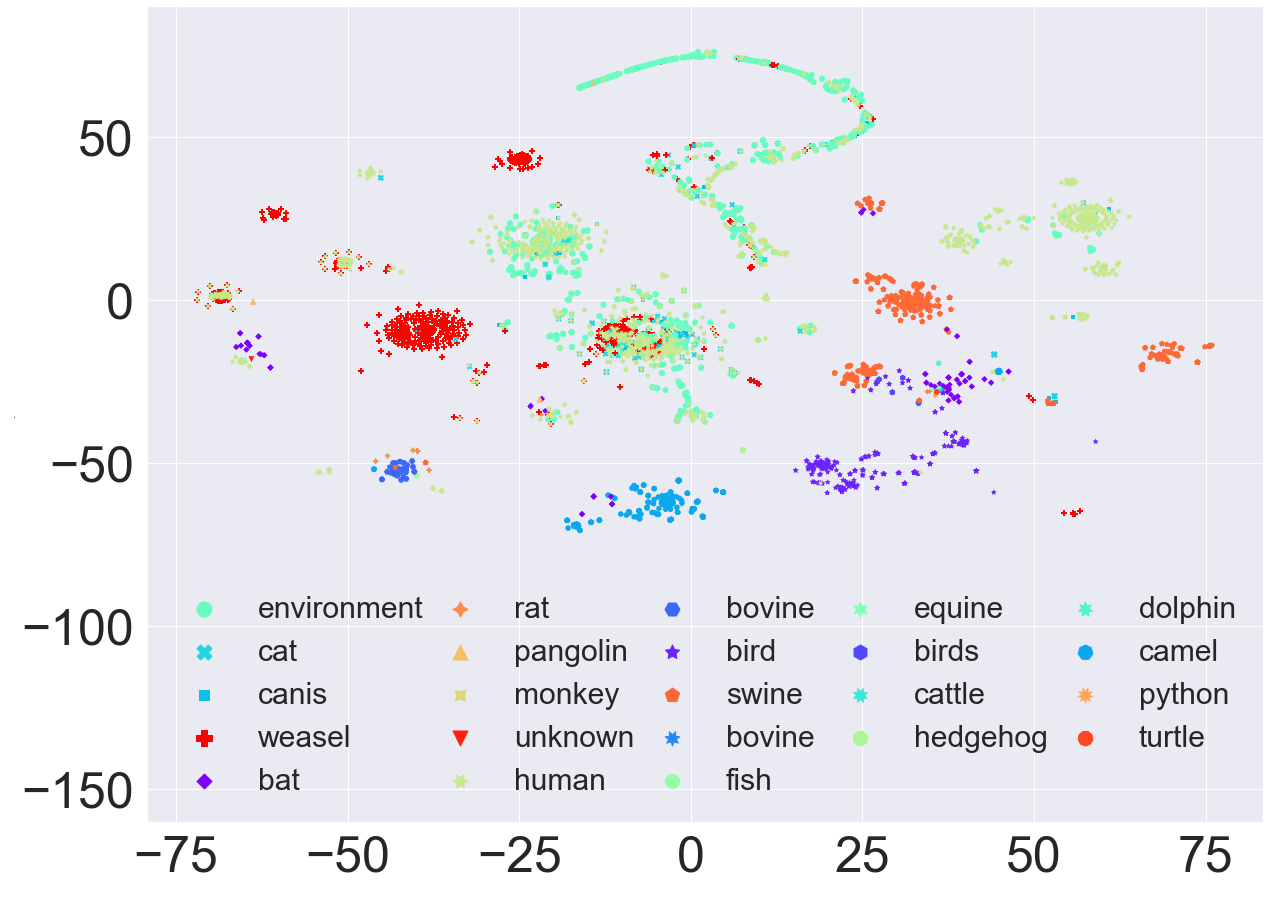

In [29]:
# az = host_names_new
az = attributes[:]
# az = month_names_few_final
# X_embedded_orig_final2 = np.array(X_embedded)
X_embedded_orig_final2 = np.array(X_embedded_orig)

colors = cm.rainbow(np.linspace(0, 1, len(np.unique(az))))
len(np.unique(az))

hst = np.unique(az)
order_top_hosts =  az

colors_top_hosts = {hst[0] : colors[0], hst[1] : colors[1],
                      hst[2] : colors[2], hst[3]: colors[3],  
                      hst[4] : colors[4],
hst[5]:colors[5],
hst[6]:colors[6],
hst[7]:colors[7],
hst[8]:colors[8],
hst[9]:colors[9],
hst[10]:colors[10],
hst[11]:colors[11],
hst[12]:colors[12],
hst[13]:colors[13],
hst[14]:colors[14],
hst[15]:colors[15],
hst[16]:colors[16],
hst[17]:colors[17],
hst[18]:colors[18],
hst[19]:colors[19],
hst[20]:colors[20],
hst[21]:colors[21],
hst[22]:colors[22]
}


data_frame_top_hosts = pd.DataFrame({' ': 
                                   np.array(X_embedded_orig_final2[:,0]), 
                           '.': np.array(X_embedded_orig_final2[:,1]), 
                           'Variants:': az})

sns.set(rc={'figure.figsize':(20,15)})

sns.scatterplot(x = ' ', 
            y = '.', 
            hue = 'Variants:', 
            hue_order = order_top_hosts,
#             markers = ordered_markers_top_hosts,
            palette = colors_top_hosts,
            data = data_frame_top_hosts,           
#             legend = 'full',
#             ax = ax12,
#             s = 100,
            linewidth=0.01,
            style = 'Variants:')
plt.ylim(-160, 90)
# plt.xlim(-80, 80)
# plt.xlabel("Steps Taken Per Day", fontsize=14)
# plt.ylabel("Calories Burned Per Day", fontsize=14)
plt.tick_params(labelsize=50)
# plt.legend(fontsize=0)
# plt.legend(fontsize=30, mode = "expand", ncol = 5)
# lgnd = plt.legend(loc="lower left", numpoints=1, fontsize=10)

lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=30, mode = "expand", ncol = 5)
for handle in lgnd.legendHandles:
    handle.set_sizes([226.0])

write_path = "\\Users\pchourasia1\Desktop\Research\Variant Classification\Spike Seq\host_kmers_clustering_tnse_plot.png"

plt.savefig(write_path)

In [19]:
X = np.array(frequency_vector)
y = np.array(int_hosts)

In [20]:
X.shape, len(y)

((5558, 15625), 5558)

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

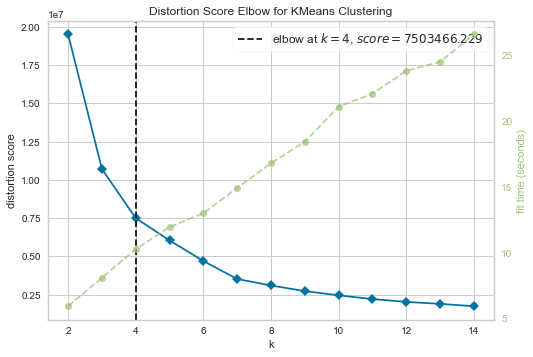

In [21]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(X)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure
visualizer.show(outpath="C:/Users/pchourasia1/Desktop/Research/Variant Classification/Spike Seq/elbow_minibatchkmeans.png")

In [22]:
X.shape, len(y)

((5558, 15625), 5558)

In [24]:
import pandas as pd
import numpy as np
import time
from sklearn.svm import SVC
#import RandomBinningFeatures
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import RidgeClassifier
from sklearn import metrics
import scipy
import matplotlib.pyplot as plt 
# import cs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import TruncatedSVD
import random
import os.path as path
import os
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


# from matplotlib import rc
# # for Arial typefont
# matplotlib.rcParams['font.family'] = 'Arial'

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import svm

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from pandas import DataFrame

from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import confusion_matrix

from numpy import mean
#import seaborn as sns

import numpy
import matplotlib.pyplot as plt
import pandas
import math
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
#for clustering, the input data is in variable X_features_test
from sklearn.cluster import KMeans


print("Packages Loaded!!!")

Packages Loaded!!!


In [25]:

clust_num = 4
print("Number of Clusters = ",clust_num)

start_time = time.time()
kmeans = KMeans(n_clusters=clust_num, random_state=0).fit(X)
kmean_clust_labels = kmeans.labels_

np.save('C:/Users/pchourasia1/Desktop/Research/Variant Classification/Spike Seq/new_Labels_kmeans.npy', kmean_clust_labels)


end_time = time.time() - start_time
print("Clustering Time in seconds =>",end_time)

Number of Clusters =  4
Clustering Time in seconds => 10.110678911209106
